In [131]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [132]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

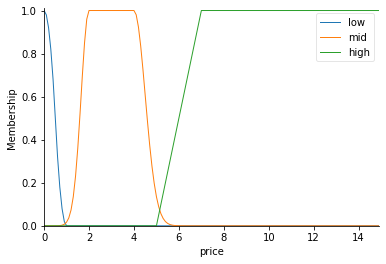

In [133]:
price = ctrl.Antecedent(np.arange(0, 15, 0.1), "price")

price['low'] = skf.zmf(price.universe, 0, 1)
price["mid"] = skf.gauss2mf(price.universe, 2, 0.35, 4, 0.5)
price["high"] = trapezoid(price.universe, 5, 7, 50, 50)

price.view()

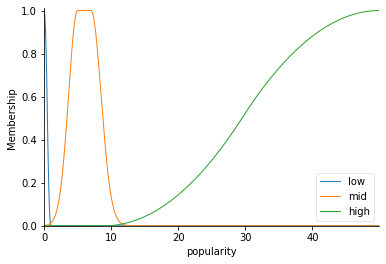

In [134]:
popularity = ctrl.Antecedent(np.arange(0, 50, 0.1), "popularity")

popularity['low'] = skf.zmf(popularity.universe, 0, 1)
popularity["mid"] = skf.gauss2mf(popularity.universe, 5, 1.35, 7, 1.5)
popularity["high"] = skf.smf(popularity.universe, 9, 50)

popularity.view()

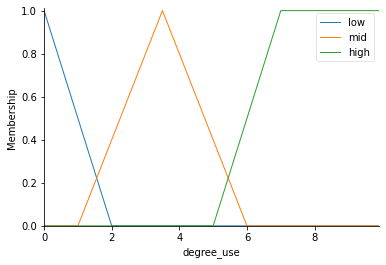

In [135]:
degree_use = ctrl.Antecedent(np.arange(0, 10, 0.1), "degree_use")

degree_use['low'] = trapezoid(degree_use.universe, -1, 0, 0, 2)
degree_use["mid"] = trapezoid(degree_use.universe, 1, 3.5, 3.5, 6)
degree_use["high"] = trapezoid(degree_use.universe, 5, 7, 10, 10)

degree_use.view()

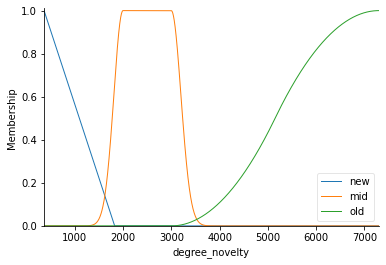

In [136]:
degree_novelty = ctrl.Antecedent(np.arange(365, 7300, 0.1), "degree_novelty")

degree_novelty['new'] = trapezoid(degree_novelty.universe, -1, 365, 365, 1825)
degree_novelty["mid"] = skf.gauss2mf(degree_novelty.universe, 2000, 190, 3000, 200)
degree_novelty["old"] = skf.smf(degree_novelty.universe, 3000, 7300)

degree_novelty.view()

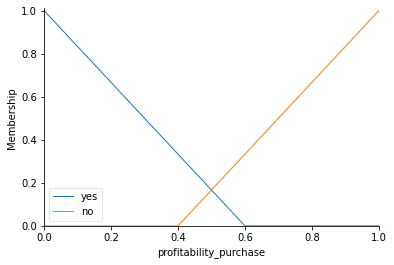

In [137]:
profitability_purchase = ctrl.Consequent(np.arange(0, 1.1, 0.1), "profitability_purchase")

profitability_purchase['yes'] = trapezoid(profitability_purchase.universe, -1, 0, 0, 0.6)
profitability_purchase['no'] = trapezoid(profitability_purchase.universe, 0.4, 1, 1, 2)

profitability_purchase.view()

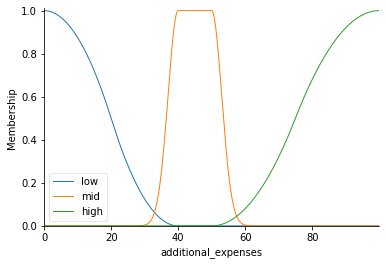

In [138]:
additional_expenses = ctrl.Consequent(np.arange(0, 100, 0.1), "additional_expenses")

additional_expenses['low'] = skf.zmf(additional_expenses.universe, 0, 40)
additional_expenses["mid"] = skf.gauss2mf(additional_expenses.universe, 40, 3, 50, 3)
additional_expenses["high"] = skf.smf(additional_expenses.universe, 50, 100)

additional_expenses.view()

In [139]:
rule1 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['low'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule2 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['low'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule3 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['low'] | degree_novelty['old'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule4 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['low'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule5 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['low'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule6 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['low'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule7 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['low'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule8 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['low'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule9 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['low'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule10 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['low'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule11 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['low'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule12 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['mid'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule13 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['mid'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule14 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['mid'] | degree_novelty['old'], 
                  [profitability_purchase['no'], additional_expenses['high']])
rule15 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['mid'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule16 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['mid'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule17 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['mid'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule18 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['mid'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule19 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['mid'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule20 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['mid'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule21 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['mid'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule22 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['mid'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule23 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['high'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule24 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['high'] | degree_novelty['mid'], 
                  [profitability_purchase['no'], additional_expenses['high']])
rule25 = ctrl.Rule(price['low'] | popularity['low'] | degree_use['high'] | degree_novelty['old'], 
                  [profitability_purchase['no'], additional_expenses['high']])
rule26 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['high'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule27 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['high'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['low']])
rule28 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['high'] | degree_novelty['new'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule29 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['high'] | degree_novelty['new'], 
                  [profitability_purchase['no'], additional_expenses['high']])
rule30 = ctrl.Rule(price['low'] | popularity['mid'] | degree_use['high'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule31 = ctrl.Rule(price['low'] | popularity['high'] | degree_use['high'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['mid']])
rule32 = ctrl.Rule(price['mid'] | popularity['low'] | degree_use['high'] | degree_novelty['mid'], 
                  [profitability_purchase['yes'], additional_expenses['high']])
rule33 = ctrl.Rule(price['high'] | popularity['low'] | degree_use['high'] | degree_novelty['mid'], 
                  [profitability_purchase['no'], additional_expenses['high']])

In [140]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule28,
              rule29, rule31, rule32, rule33]

mark_ctrl = ctrl.ControlSystem(rules_base)
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.4999999999999999
50.461506002218165


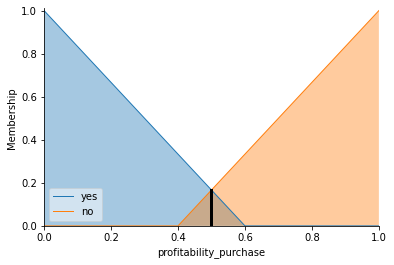

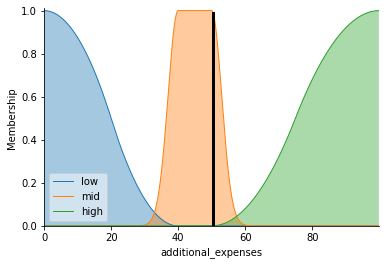

In [141]:
#1
marking.input['price'] = 0
marking.input['popularity'] = 0
marking.input['degree_use'] = 0
marking.input['degree_novelty'] = 0
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


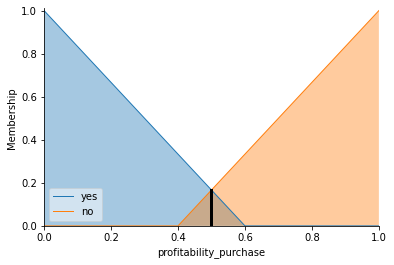

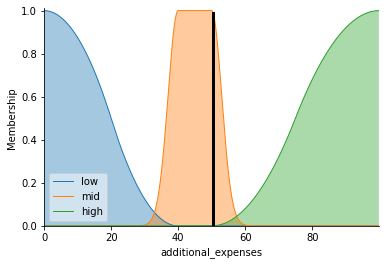

In [142]:
#2
marking.input['price'] = 3
marking.input['popularity'] = 20
marking.input['degree_use'] = 10
marking.input['degree_novelty'] = 2300
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


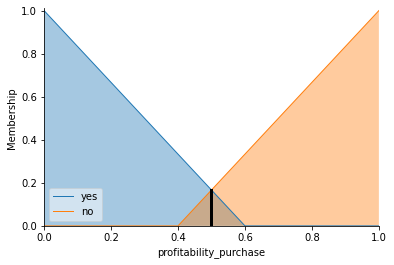

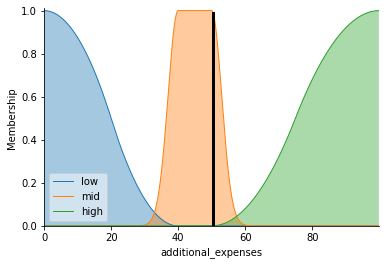

In [143]:
#3
marking.input['price'] = 0.4
marking.input['popularity'] = 0
marking.input['degree_use'] = 10
marking.input['degree_novelty'] = 365
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.46150646244384


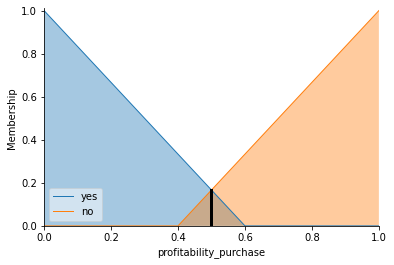

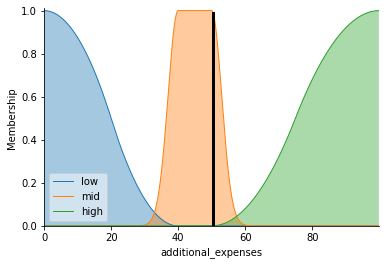

In [144]:
#4
marking.input['price'] = 15
marking.input['popularity'] = 50
marking.input['degree_use'] = 10
marking.input['degree_novelty'] = 7300
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


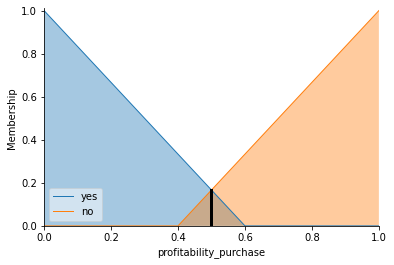

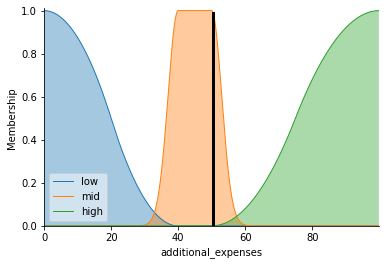

In [145]:
#5
marking.input['price'] = 0
marking.input['popularity'] = 50
marking.input['degree_use'] = 10
marking.input['degree_novelty'] = 7300
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4233241269394852
50.461506002218165


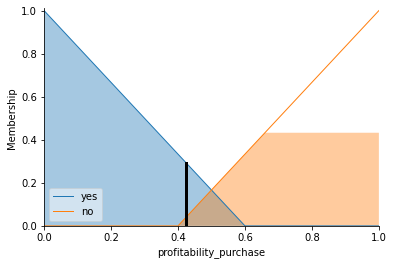

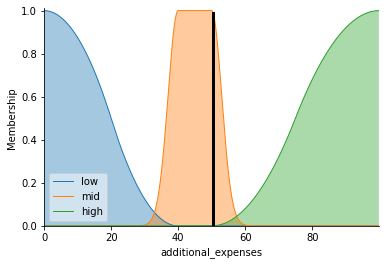

In [146]:
#6
marking.input['price'] = 1
marking.input['popularity'] = 50
marking.input['degree_use'] = 0
marking.input['degree_novelty'] = 5000
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


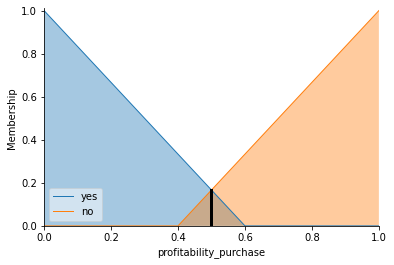

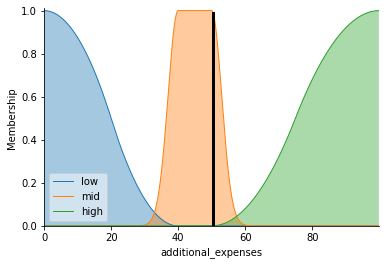

In [147]:
#7
marking.input['price'] = 1
marking.input['popularity'] = 50
marking.input['degree_use'] = 0
marking.input['degree_novelty'] = 2000
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999757242655576
50.461506002218165


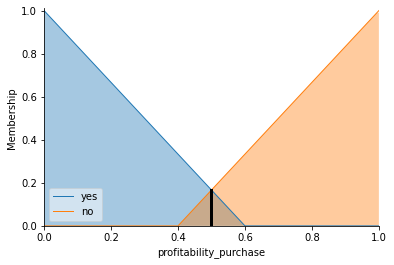

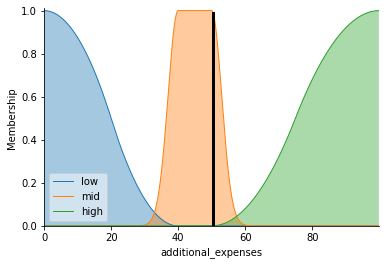

In [148]:
#8
marking.input['price'] = 1
marking.input['popularity'] = 10
marking.input['degree_use'] = 0
marking.input['degree_novelty'] = 7000
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


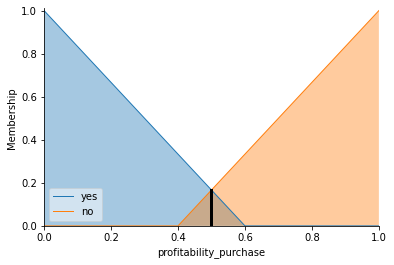

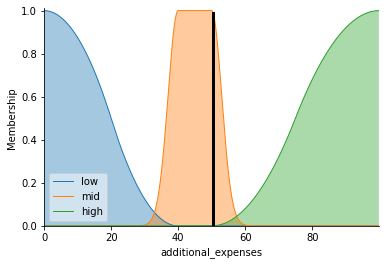

In [150]:
#9
marking.input['price'] = 0
marking.input['popularity'] = 50
marking.input['degree_use'] = 5
marking.input['degree_novelty'] = 7300
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)

0.4999999999999999
50.461506002218165


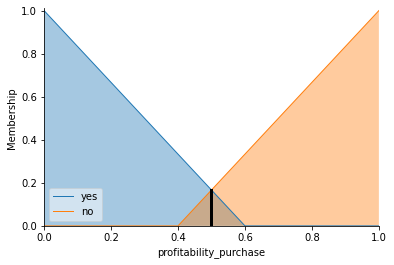

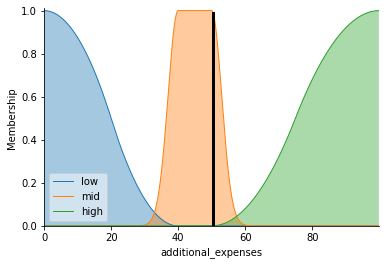

In [151]:
#10
marking.input['price'] = 0
marking.input['popularity'] = 50
marking.input['degree_use'] = 2
marking.input['degree_novelty'] = 365
marking.compute()

print(marking.output['profitability_purchase'])
profitability_purchase.view(sim=marking)
print(marking.output['additional_expenses'])
additional_expenses.view(sim=marking)